<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Mahotas_Fracionado_teste_005_nov_14_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

In [0]:
# proximas etapas que falta : dividir a foto em 10x10 e aplicar o mahotas em cada foto
# encontrar 
# GLCM?
# COLOCAR MAIS VARIAVEIS NAS FOTOS
# VER QUAIS PARAMETROS USAR PARA CALCULAR O PSD (particle size distribution)
# GERAR AS IMAGENS ARTIFICIAIS

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
%matplotlib inline

In [4]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

--2019-11-14 19:41:45--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip.14’

quadrado_v2.zip.14  100%[===================>]  21.76M  6.76MB/s    in 3.2s    

2019-11-14 19:41:49 (6.76 MB/s) - ‘quadrado_v2.zip.14’ saved [22819538/22819538]



In [5]:
!ls

16_0634.jpg  25_0706.jpg  40_0780.jpg	  quadrada.zip.2      quadrado_v2.zip.2
16_0639.jpg  25_0710.jpg  45_0794.jpg	  quadrada.zip.3      quadrado_v2.zip.3
16_0640.jpg  30_0732.jpg  45_0797.jpg	  quadrada.zip.4      quadrado_v2.zip.4
18_0655.jpg  30_0735.jpg  45_0802.jpg	  quadrado_v2.zip     quadrado_v2.zip.5
18_0656.jpg  30_0737.jpg  70_0816.jpg	  quadrado_v2.zip.1   quadrado_v2.zip.6
18_0658.jpg  35_0751.jpg  70_0818.jpg	  quadrado_v2.zip.10  quadrado_v2.zip.7
20_0680.jpg  35_0757.jpg  70_0821.jpg	  quadrado_v2.zip.11  quadrado_v2.zip.8
20_0681.jpg  35_0760.jpg  quadrada	  quadrado_v2.zip.12  quadrado_v2.zip.9
20_0688.jpg  40_0776.jpg  quadrada.zip	  quadrado_v2.zip.13  sample_data
25_0703.jpg  40_0777.jpg  quadrada.zip.1  quadrado_v2.zip.14


In [0]:
Size=10 # tamanho da foto
Sub_Size=2 # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='quadrado_v2.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [8]:
print(file_name)

<zipfile.ZipFile filename='quadrado_v2.zip' mode='r'>


--2019-11-14 19:41:52--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip.15’

quadrado_v2.zip.15  100%[===================>]  21.76M  6.86MB/s    in 3.2s    

2019-11-14 19:41:56 (6.86 MB/s) - ‘quadrado_v2.zip.15’ saved [22819538/22819538]



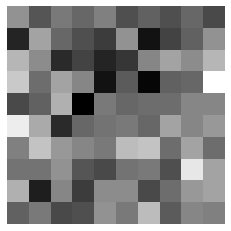

In [9]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
# all images are load in variable x...
FILE=Transfere
img_name=[]
xw=[]
ww=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #xw.append(cv2.imread(name))
        xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pw=np.zeros((nrow,ncol))
#pw=[]
for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()

plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [0]:
Nomes=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']


In [11]:
#foto 0 (k=0)
k=0
#p_foto=pp[k,:].reshape(Size,Size)
p_foto=pw[k,:].reshape(Size,Size)
GLCM=[]
glcm_haralick=[]
x_ref=[]
Count=Sub_Size
p=np.zeros((Sub_Size,Sub_Size))
j_ref=0
Cada_foto=[]
for k in range(Size):
  if((k+Sub_Size-1)<Size):
    for i in range(Sub_Size):
      for j in range(Sub_Size):
        p[i,j]=p_foto[Crop+i,j+k]
    #plt.imshow(p, cmap = "gray")
    print(p)
    WW=np.copy(p) 
    Cada_foto.append(WW.ravel())
    x_ref.append(Count-Sub_Size)
    Count=Count+1
    
    Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Nomes)
    
    GLCM=[]
    for ii in Nomes:
      GLCM.append(Mahotas[ii].mean())
      #print('cheguei aqui!!!')
    glcm_haralick.append(GLCM)

df=pd.DataFrame(glcm_haralick,columns=Nomes)
print(df)
#print(Cada_foto)

[[132. 121.]
 [114. 125.]]
[[121. 100.]
 [125. 118.]]
[[100. 110.]
 [118. 115.]]
[[110. 112.]
 [115. 113.]]
[[112. 113.]
 [113. 124.]]
[[113. 110.]
 [124. 125.]]
[[110. 120.]
 [125. 111.]]
[[120. 115.]
 [111. 120.]]
[[115. 118.]
 [120. 111.]]
     ASM  constrast    correl  ...  dif entropy      IMC1      IMC2
0  0.375      97.25 -0.855882  ...         0.25 -1.000000  0.960337
1  0.375     262.25 -0.566940  ...         0.50 -1.000000  0.960337
2  0.375     129.50 -0.613119  ...         0.50 -1.000000  0.960337
3  0.375       8.75 -0.653846  ...         0.25 -1.000000  0.960337
4  0.500      66.50 -0.128866  ...         0.50 -0.583333  0.697405
5  0.375     129.50 -0.511494  ...         0.50 -1.000000  0.960337
6  0.375      81.75 -0.958599  ...         0.50 -1.000000  0.960337
7  0.500      30.50 -0.429825  ...         0.50 -0.583333  0.697405
8  0.375      25.50 -0.891304  ...         0.50 -1.000000  0.960337

[9 rows x 13 columns]


In [12]:
print(pd.DataFrame(Cada_foto))

       0      1      2      3
0  132.0  121.0  114.0  125.0
1  121.0  100.0  125.0  118.0
2  100.0  110.0  118.0  115.0
3  110.0  112.0  115.0  113.0
4  112.0  113.0  113.0  124.0
5  113.0  110.0  124.0  125.0
6  110.0  120.0  125.0  111.0
7  120.0  115.0  111.0  120.0
8  115.0  118.0  120.0  111.0


In [13]:
print(np.array(Cada_foto).shape)

(9, 4)


In [14]:
print(np.array(GLCM).shape)
print(Mahotas)

(13,)
    ASM  constrast    correl  variance  ...   dif var  dif entropy  IMC1      IMC2
0  0.25       45.0 -0.956522      11.5  ...  0.004064          1.0  -1.0  0.990800
1  0.50       16.0 -1.000000       4.0  ...  0.008196         -0.0  -1.0  0.929873
2  0.25       37.0 -0.608696      11.5  ...  0.004064          1.0  -1.0  0.990800
3  0.50        4.0 -1.000000       1.0  ...  0.008196         -0.0  -1.0  0.929873

[4 rows x 13 columns]


In [15]:
print(pd.DataFrame(Cada_foto))

       0      1      2      3
0  132.0  121.0  114.0  125.0
1  121.0  100.0  125.0  118.0
2  100.0  110.0  118.0  115.0
3  110.0  112.0  115.0  113.0
4  112.0  113.0  113.0  124.0
5  113.0  110.0  124.0  125.0
6  110.0  120.0  125.0  111.0
7  120.0  115.0  111.0  120.0
8  115.0  118.0  120.0  111.0


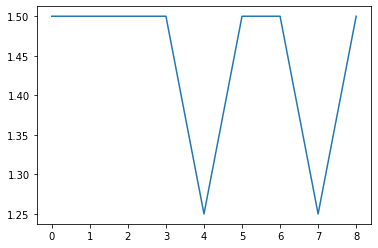

In [16]:
plt.plot(x_ref,df['entropy'])

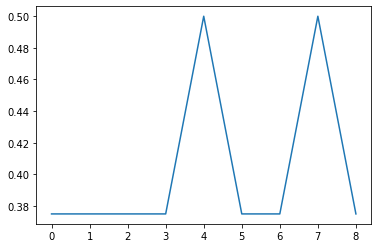

In [17]:
plt.plot(x_ref,df['ASM'])

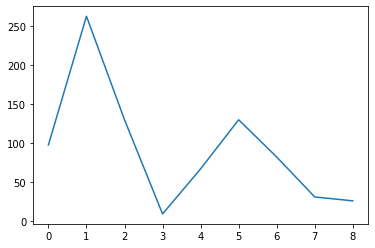

In [18]:
plt.plot(x_ref,df['constrast'])   

In [19]:
Cada_foto[0]

array([132., 121., 114., 125.])

129.5


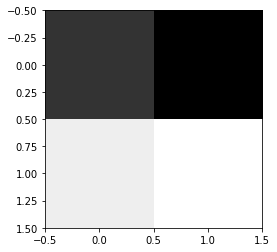

In [20]:
n=5
plt.imshow(Cada_foto[n].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[n])  


129.5


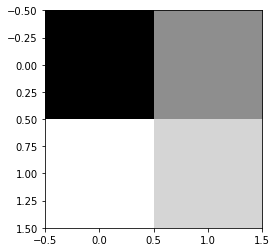

In [21]:
n=2
plt.imshow(Cada_foto[n].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[n])

In [22]:
np.array(Cada_foto).shape

(9, 4)

In [0]:
plt.imshow(Cada_foto[50].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[50])  

In [0]:

for i in range(1, 14):
    plt.subplot(5, 3, i)
    plt.plot(x_ref,df[Nomes[i-1]])
    plt.subplots_adjust(hspace = 1.8)
    #fig.tight_layout() 
    plt.title(Nomes[i-1])
    #plt.ylabel(Nomes[i-1])



    #plt.text(0.5, 0.5,Nomes[i-1]),fontsize=18, ha='center')